## 1.이항분류
- 합격/불합격 판정
- 3과목의 평균 60점 이상 합격, 과락 40점미만

### 1-01. 함수 생성

In [ ]:
# 사용할 라이브러리 import 
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [ ]:
# sample로 사용할 DataSet을 생성하는 함수 작성
# X: 국어, 영어, 수학 점수
# Y: 합격여부 (X의 평균 60이상, 과락 40점 미만)

# seedno : 랜덤 수 생성 규칙
# size : 랜덤 수 생성 행의 수
# step=0 (균형), step=다른수 (불균형)


In [ ]:
# 모델 학습 및 성능 평가 함수 생성


### 1-02. 데이터의 중요성

In [ ]:
# 충분한 데이터가 필요한 이유를 알아보겠습니다.

In [ ]:
# 균형 데이터   # 1234, 1225, 1245
for no in [1234, 1225, 1245] :
    model1 = LogisticRegression(max_iter=1000)
    data = make_sample(seedno=no, size=20000)
    ModelTrain(model1, data)

In [ ]:
# 불균형 데이터
for no in [1234, 1225, 1245] :
    model2 = LogisticRegression(max_iter=1000)
    data = make_sample(seedno=no, size=32000, step=1)
    ModelTrain(model2, data)

In [ ]:
# 부족한 데이터   # 1234, 1225, 1245
for no in [1234, 1225, 1245] :
    model3 = LogisticRegression(max_iter=1000)
    data = make_sample(seedno=no, size=40)
    ModelTrain(model3, data)

In [ ]:
# 부족한, 불균형 데이터 # 1234, 1225, 1245
for no in [1234, 1225, 1245] :
    model4 = LogisticRegression(max_iter=1000)
    data = make_sample(no, 60, step=1)
    ModelTrain(model4, data)

### 1-03. 파생변수 사용
- 합격/불합격 여부를 결정하는 평균, 과락에 관련된 파생변수를 추가하여 봅니다.

In [ ]:
# 데이터 생성
data = make_sample(seedno=1245, size=20000)
data.head(2)

In [ ]:
# 파생변수 생성/추가
data['평균'] = data[['국어', '영어', '수학']].mean(axis=1)
data['최저'] = data[['국어', '영어', '수학']].min(axis=1)
data.head(2)

In [ ]:
for no in [1234, 1225, 1245] :
    model5 = LogisticRegression(max_iter=1000)
    data = make_sample(seedno=no, size=20000)
    data['평균'] = data[['국어', '영어', '수학']].mean(axis=1)
    data['최저'] = data[['국어', '영어', '수학']].min(axis=1)
    ModelTrain(model5, data)

In [ ]:
# 모든 값을 사용한 예측 결과
def make_all():
    colnames = ['국어', '영어', '수학']
    data = [[kor, eng, mat] for kor in range(101) for eng in range(101) for mat in range(101)]
    data = pd.DataFrame(data, columns=colnames)
    data['평균'] = data[['국어', '영어', '수학']].mean(axis=1)
    data['최저'] = data[['국어', '영어', '수학']].min(axis=1)
    data['합격여부'] = (data['평균'] >=60) & (data['최저'] >= 40)
    data['합격여부'] = data['합격여부'].replace({True:1, False:0})  # 합격:1, 불합격:0
    return data

In [ ]:
data = make_all()
X1 = data.iloc[:, :3]
X2 = data.drop(columns=['합격여부'])
Y = data['합격여부']
print(Y.value_counts())

for x in model1, model2, model3, model4:
    print(x.score(X1, Y))
print(model5.score(X2, Y)) 

### 1-04. 스케일러 사용

In [ ]:
for no in [1234, 1225, 1245] :
    model6 = LogisticRegression(max_iter=1000)
    data = make_sample(seedno=no, size=20000)
    data['국어'] *= 500
    data['수학'] *= 1000
    ModelTrain(model6, data)

In [ ]:
# StancardScaler 사용하여 정규 분포 만들기
from sklearn.preprocessing import StandardScaler

for no in [1234, 1225, 1245]:
    model7 = LogisticRegression(max_iter=1000)
    data = make_sample(seedno=no, size=20000)
    data['국어'] *= 500
    data['수학'] *= 1000    
    X = data[['국어', '영어', '수학']]
    Y = data['합격여부']
    scaledX = StandardScaler().fit_transform(X)
    scaledX = pd.DataFrame(scaledX, columns=['국어', '영어', '수학'])
    data = pd.concat([scaledX, Y], axis=1)
    ModelTrain(model7, data)

### 1-05. 다양한 모델의 사용

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

#### A) **데이터 생성**

In [ ]:
# 학습용 데이터
data = make_sample(seedno=1234, size=20000)

# 평가용 데이터
all = make_all()
X = all.iloc[:, :3]
Y = all['합격여부']

#### B) **LogisticRegression**
- 독립 변수의 선형 결합을 이용하여 사건의 발생 가능성을 예측하는데 사용되는 통계 기법
- https://ko.wikipedia.org/wiki/%EB%A1%9C%EC%A7%80%EC%8A%A4%ED%8B%B1_%ED%9A%8C%EA%B7%80
- 반복하면서 기울기 값을 갱신, 기울기 미분값이 0이 되는 지점을 찾음  
- max_iter, tol 등을 변경하여 성능을 개선할 수 있음
- max_iter : 반복횟수
- tol : 허용오차, 반복을 중단하는 조건으로 사용됨
- panalty : panalty 종류
- C : panalty 세기
- (penalty='l2', *, dual=False, tol=0.0001, C=1.0, fit_intercept=True, intercept_scaling=1, class_weight=None, random_state=None, solver='lbfgs', max_iter=100, multi_class='auto', verbose=0, warm_start=False, n_jobs=None, l1_ratio=None)

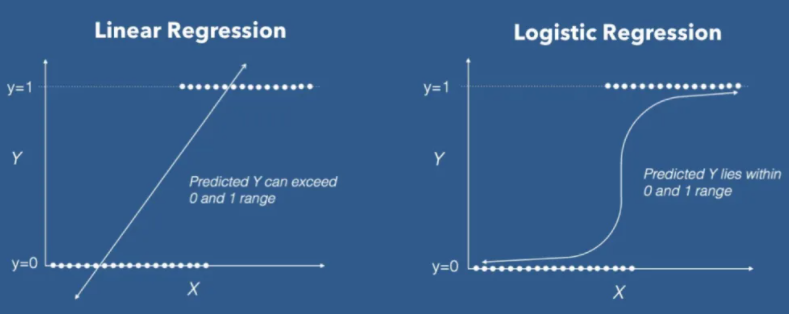

In [ ]:
help(LogisticRegression)

In [ ]:
model_lr = LogisticRegression(max_iter=1000)
ModelTrain(model_lr, data)
print(model_lr.score(X, Y))

#### C) **KNeighborsClassifier**
- k 개의 근접 이웃을 확인하여 클래스를 선택함
- n_neighbors를 변경하여 성능을 개선할 수 있음
- n_neighbors : 확인할 근접 이웃 개수
- (n_neighbors=5, *, weights='uniform', algorithm='auto', leaf_size=30, p=2, metric='minkowski', metric_params=None, n_jobs=None)

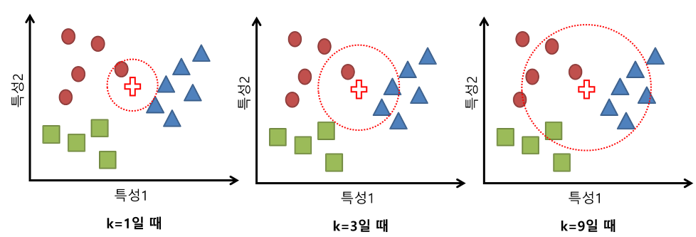

- 출처 : https://bskyvision.com/563?category=635506

In [ ]:
help(KNeighborsClassifier)

In [ ]:
for k in range(3, 10):
    model_knn = KNeighborsClassifier(n_neighbors=k)
    ModelTrain(model_knn, data)
    print(f'k={k}, {model_knn.score(X, Y)}')

#### D) **DecisionTreeClassifier**
- overfitting 경향이 있음
- max_depth를 줄이는 방법으로 overfitting 해결
- (*, criterion='gini', splitter='best', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=None, random_state=None, max_leaf_nodes=None, min_impurity_decrease=0.0, class_weight=None, ccp_alpha=0.0)

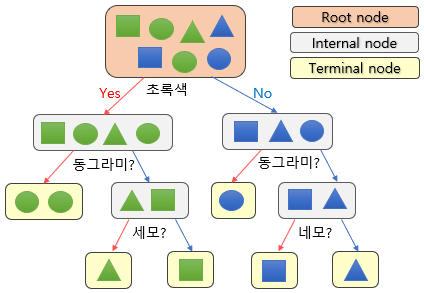

In [ ]:
help(DecisionTreeClassifier)

In [ ]:
model_dc1 = DecisionTreeClassifier()
ModelTrain(model_dc1, data)
print(model_dc1.score(X, Y))

In [ ]:
model_dc1.get_depth()

In [ ]:
model_dc2 = DecisionTreeClassifier(max_depth=6)
ModelTrain(model_dc2, data)
print(model_dc2.score(X, Y))

In [ ]:
model_dc3 = DecisionTreeClassifier(max_depth=3)
ModelTrain(model_dc3, data)
print(model_dc3.score(X, Y))

#### E) **RandomForestClassifier**
- DecisionTreeClassifier를 100개 사용하는 앙상블 모델
- n_estimators의 개수를 늘리거나, max_depth의 숫자를 조절하는 방법으로 성능 조절 가능
- (n_estimators=100, *, criterion='gini', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features='auto', max_leaf_nodes=None, min_impurity_decrease=0.0, bootstrap=True, oob_score=False, n_jobs=None, random_state=None, verbose=0, warm_start=False, class_weight=None, ccp_alpha=0.0, max_samples=None)

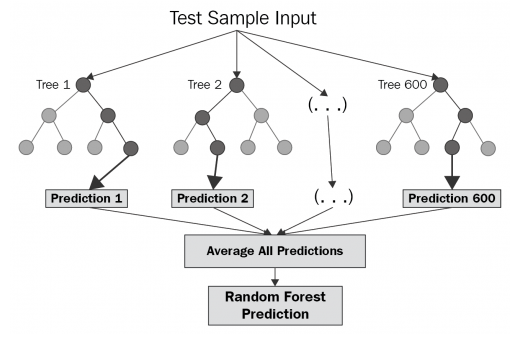
- 출처 : ```http://itwiki.kr/w/%EB%9E%9C%EB%8D%A4_%ED%8F%AC%EB%A0%88%EC%8A%A4%ED%8A%B8```

In [ ]:
help(RandomForestClassifier)

In [ ]:
model_rf1 = RandomForestClassifier()
ModelTrain(model_rf1, data)
print(model_rf1.score(X, Y))

In [ ]:
model_rf2 = RandomForestClassifier(n_estimators=500)
ModelTrain(model_rf2, data)
print(model_rf2.score(X, Y))

#### F) **XGBClassifier**

In [ ]:
from xgboost import XGBClassifier
model_xgb1 = XGBClassifier()
ModelTrain(model_xgb1, data)
print(model_rf1.score(X, Y))

In [ ]:
model_xgb2 = XGBClassifier(n_estimator=500, max_depth=5)
ModelTrain(model_xgb2, data)
print(model_xgb2.score(X, Y))

### 1-06. 성능평가


In [ ]:
# 앞서 성능이 좋았던 RandomForestClassifier를 사용하여 모델을 생성합니다.
data = make_sample(seedno=1234, size=50000)
model_rf = RandomForestClassifier(n_estimators=500)
ModelTrain(model_rf, data)

In [ ]:
# 앞서 성능이 좋았던 XGBClassifier를 사용하여 모델을 생성합니다.
data = make_sample(seedno=1234, size=50000)
model_xgb = XGBClassifier(n_estimators=500)
ModelTrain(model_xgb, data)

오분류표
- sklearn.metrics.confusion_matrix(y_true, y_pred, *, labels=None, sample_weight=None, normalize=None)
- y_ture: 실제값
- y_pred: 예측값


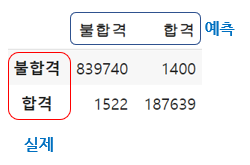

In [ ]:
# RandomForestClassifier의 각 종류별 정확도를 확인해 보도록 합니다.
from sklearn.metrics import confusion_matrix
label=['불합격', '합격']
print(model_rf.score(X, Y))
y_pred = model_rf.predict(X)
a = confusion_matrix(Y, y_pred)
b = pd.DataFrame(a, columns=label, index=label)
b

In [ ]:
# XGBClassifier의 각 종류별 정확도를 확인해 보도록 합니다.
from sklearn.metrics import confusion_matrix
label = ['불합격', '합격']
print(model_xgb.score(X, Y))
y_pred = model_xgb.predict(X)
a = confusion_matrix(Y, y_pred)
b = pd.DataFrame(a, columns=label, index=label)
b

In [ ]:
# 합격일 확률 구하기 (다른 데이터 사용)
data = make_sample(seedno=1234, size=6)
x_test = data[['국어', '영어', '수학']]
y_test = data['합격여부'] 
print(y_test.to_numpy()) # 실제값
print(model_xgb.predict(x_test))  # 예측값
proba = model_xgb.predict_proba(x_test)
print(proba)

### 1-07. 예측값 저장

In [ ]:
# test 데이터에서 '합격'일 확률에 대한 정보를 저장하여 출력합니다
submission = pd.DataFrame()
submission['id'] = pd.RangeIndex(1, len(X) + 1)
submission['prob'] = model_xgb.predict_proba(X)[:, 1]
submission.to_csv('submission.csv', index=False)

## 2.작업형 2 예시문제

### 2-01.문제이해

아래는 백화점 고객의 1년간 구매 데이터이다.

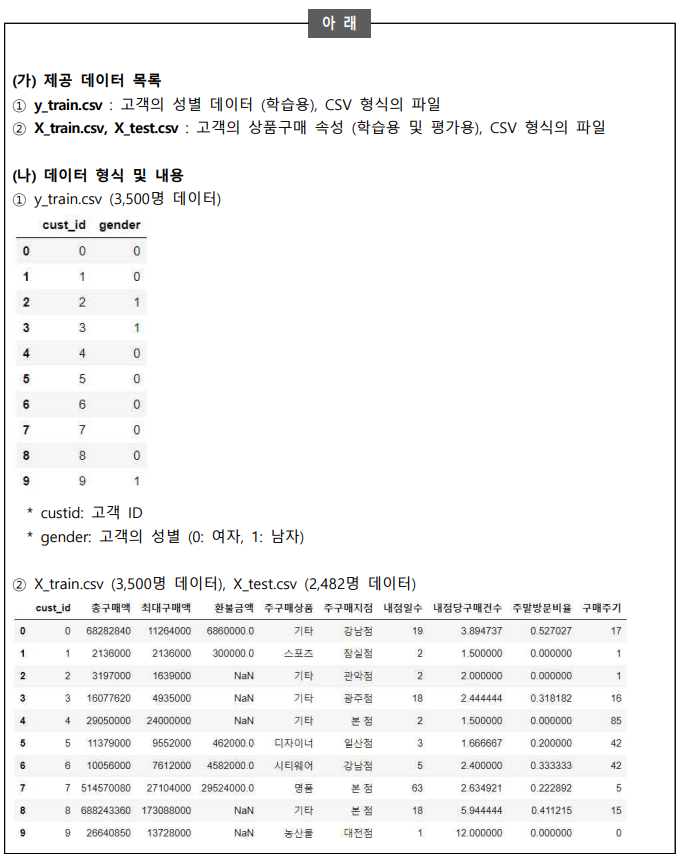

고객 3,500명에 대한 학습용 데이터(y_train.csv, X_train.csv)를 이용하여 성별예측 모형을 만든 후, 이를 평가용 데이터(X_test.csv)에 적용하여 얻은 2,482명 고객의 성별 예측값(남자일 확률)을 다음과 같은 형식의 csv 파일로 생성하시오. (제출한 모델의 성능은 ROC-AUC 평가지표에 따라 채점)

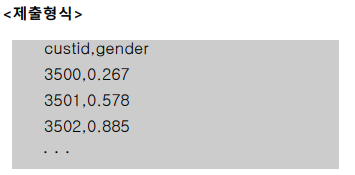

유의 사항

성능이 우수한 예측 모형을 구축하기 위해서는 적절한 데이터 전처리, Feature Engineering, 분류 알고리즘 사용, 초매개변수 최적화, 모형 앙상블 등이 수반되어야 한다.

### 2-02.데이터 불러오기, 탐색

In [ ]:
!git clone https://github.com/Soyoung-Yoon/bigdata

Cloning into 'bigdata'...
remote: Enumerating objects: 32, done.
remote: Counting objects: 100% (32/32), done.
remote: Compressing objects: 100% (32/32), done.
remote: Total 32 (delta 8), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (32/32), done.


In [ ]:
# [0] 사용 라이브러리 import
import pandas as pd

# 데이타가 많은경우 모두 출력 안되고 ... 으로 생략해서 출력됨.
# 시험환경에서는 아래와 같이 해야해서 수정했습니다 ^^*
pd.options.display.max_rows = 500     #출력할 max row를 지정
pd.options.display.max_columns = 20   #출력할 max columns를 지정
#출력 format 지정 - 소수점아래 4자리까지
pd.set_option('display.float_format', '{:.4f}'.format)

In [ ]:
# [1] 학습 데이터 X_train.csv 가져오기
X = pd.read_csv('bigdata/X_train.csv', encoding='cp949')
print(X.head(2))

   cust_id      총구매액     최대구매액         환불금액 주구매상품 주구매지점  내점일수  내점당구매건수  \
0        0  68282840  11264000 6860000.0000    기타   강남점    19   3.8947   
1        1   2136000   2136000  300000.0000   스포츠   잠실점     2   1.5000   

   주말방문비율  구매주기  
0  0.5270    17  
1  0.0000     1  


In [ ]:
# [2] 학습 데이터 y_train.csv 가져오기
Y = pd.read_csv('bigdata/y_train.csv')
print(Y.head(2))

   cust_id  gender
0        0       0
1        1       0


In [ ]:
# [3] 제출용 데이터 X_test.csv 가져오기
X_submission = pd.read_csv('bigdata/X_test.csv', encoding='cp949')
print(X_submission.head(2))

   cust_id       총구매액     최대구매액          환불금액 주구매상품 주구매지점  내점일수  내점당구매건수  \
0     3500   70900400  22000000  4050000.0000    골프  부산본점    13   1.4615   
1     3501  310533100  38558000 48034700.0000   농산물   잠실점    90   2.4333   

   주말방문비율  구매주기  
0  0.7895    26  
1  0.3699     3  


### 2-03.데이터전처리

In [ ]:
# 1. 결측치 없도록 한다
# 2. dtype : int, float 만 가능함!
#    object, datetime64, timedelta64 -> 적절하게 변경

In [ ]:
# [4] X, X_submission에 동일한 전처리를 위해 두 데이터 결합하여 
# dfX로 이름 붙이기


In [ ]:
# [5] 각 컬럼의 dtype 및 행, 열 개수 확인


In [ ]:
# 이때! 문제지와 잘 비교해서 틀린 정보가 없는지 확인해야 합니다.

In [ ]:
# [6] dfX의 컬럼별 결측치 확인하기


In [ ]:
# 결측치 - 너무 많은 결측치를 가진 경우 
# 1. 해당 컬럼을 제거하고 사용
# 2. 다른 값으로 채우기 - 범주형 변수 (새로운 범주 생성), 연속형 변수 (평균, 중앙값)

In [ ]:
# [7] 결측치를 채우기 위한 값 선정을 위한 작업
# 주구매상품별로 환불금액 평균이 다름을 확인


In [ ]:
# [8] '주구매상품'별 '환불금액' 평균으로 '환불금액'의 결측치를 채우기 한다
# 채우기 한 뒤 '환불금액'으로 추가한다. 


In [ ]:
# [9] '환불금액' 컬럼의 결측치 행을 확인해 본다


In [ ]:
# [10] '주구매상품'별 평균을 구할 수 없는 경우 '환불금액'을 '환불금액'의 평균으로 채우기 합니다.
# 채우기 후에 채우기가 잘 적용되었는지 확인합니다.


In [ ]:
# [11] dfX에서 높은 상관계수 확인하기 (X Feature간)
# 상관관계가 높은 X1, X2가 있다면 제거 : -1 또는 1에 가까운 것은 좋지 않음


In [ ]:
# [12] Y['gender'] 값의 분포 확인 - 여성 (62.4%), 남성 (37.6%)


In [ ]:
dfX.iloc[:3500,:].columns, Y.columns

In [ ]:
# [13] dfX.iloc[:3500,:], Y를 병합(merge)하여 dfXY를 만들어 사용


In [ ]:
#temp = pd.concat([dfX.iloc[:3500,:], Y['gender']], axis=1)
#temp.columns, temp.shape

In [ ]:
# [14] dfXY를 사용해 성별별 평균을 구한다.
# 'gender'에 따라 총구매액 ~ 구매주기에 값의 차이가 있는지 확인한다.


In [ ]:
# [15] dfXY를 사용해 '주구매지점'별, 'gender'별 방문횟수를 확인한다
# 성별에 다른 분포가 있으므로 '주구매지점' 포함


In [ ]:
# [16] dfXY를 사용해 '주구매상품'별, 'gender'별 방문횟수를 확인한다
# 성별에 다른 분포가 있으므로 '주구매상품' 포함


In [ ]:
# object dtype 이었던 '주구매지점' '주구매상품' => 숫자로 변경

In [ ]:
# [17] dfX에서 '주구매지점'에 대해 중복을 제거해 본다 (고윳값을 확인함)


In [ ]:
# [18] dfX에서 '주구매상품'에 대해 중복을 제거해 본다 (고윳값을 확인함)


In [ ]:
# [19] '주구매지점', '주구매상품'에 대해 Label Encoding을 실행한다
# 항목별 순서 개념이 없는 경우


In [ ]:
# [20] 최종 데이터 점검
# 결측치 확인, 데이터타입 확인(수치형)


### 2-04.데이터 분리, 모델 생성 및 학습

In [ ]:
# [21] 사용할 도구 import
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import roc_auc_score

In [ ]:
# [22] train score, test score, roc_auc_score 를 반환하는 함수 작성


In [ ]:
# [23] 다양한 모델을 만들고 성능을 출력하는 함수 작성


In [ ]:
# [24] X를 train 용도, submission 용도로 나누고, Y를 1차원으로 바꿈 
# (StandardScaler 적용)


In [ ]:
# [25] dfX, Y 사용 

# X, Y 분리하기

# train, test  7:3 분할, stratify 적용, random_state=0 적용

# 다양한 모델 만들어 보기


In [ ]:
# [26] roc_auc 가장 성능이 좋은 모델 선택


In [ ]:
# 또는 GridSearchCV를 사용해 좋은 parameter를 찾아볼 수 있음

### 2-05.제출할 데이터 생성

In [ ]:
X_submission.columns

Index(['cust_id', '총구매액', '최대구매액', '환불금액', '주구매상품', '주구매지점', '내점일수', '내점당구매건수',
       '주말방문비율', '구매주기'],
      dtype='object')

In [ ]:
# [27] X1_submission 으로 cust_id와 예측한 남자일 확률을 파일로 저장하기


In [ ]:
# [28] 파일 읽어 출력해 보기


In [ ]:
## 시험환경 - 체험하기에 제출했던 내용
# 출력을 원하실 경우 print() 함수 활용
# 예시) print(df.head())

# getcwd(), chdir() 등 작업 폴더 설정 불필요
# 파일 경로 상 내부 드라이브 경로(C: 등) 접근 불가

# 데이터 파일 읽기 예제
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import roc_auc_score

# 시험환경에서는 아래와 같이 해야해서 수정했습니다 ^^*
pd.options.display.max_rows = 500     #출력할 max row를 지정
pd.options.display.max_columns = 20   #출력할 max columns를 지정

def get_scores(model, xtrain, xtest, ytrain, ytest):
    A = model.score(xtrain, ytrain)
    B = model.score(xtest, ytest)
    ypred = model.predict_proba(xtest)[:, 1]
    C = roc_auc_score(ytest, ypred)
    return '{:.4f} {:.4f} {:.4f}'.format(A, B, C)

def make_models(xtrain, xtest, ytrain, ytest):
    model1 = LogisticRegression(max_iter=5000).fit(xtrain, ytrain)
    print('model1', get_scores(model1, xtrain, xtest, ytrain, ytest))

    for k in range(1, 10):
        model2 = KNeighborsClassifier(k).fit(xtrain, ytrain)
        print('model2', k, get_scores(model2, xtrain, xtest, ytrain, ytest))

    # overfitting ??
    model3 = DecisionTreeClassifier(random_state=0).fit(xtrain, ytrain)
    print('model3', get_scores(model3, xtrain, xtest, ytrain, ytest))
    for d in range(3, 8):
        model3 = DecisionTreeClassifier(max_depth=d, random_state=0).fit(xtrain, ytrain)
        print('model3', d, get_scores(model3, xtrain, xtest, ytrain, ytest)) 

    # overfitting ??
    model4 = RandomForestClassifier(random_state=0).fit(xtrain, ytrain)
    print('model4', get_scores(model4, xtrain, xtest, ytrain, ytest))
    for d in range(3, 8):
        model4 = RandomForestClassifier(500, max_depth=d,random_state=0).fit(xtrain, ytrain)
        print('model4', d, get_scores(model4, xtrain, xtest, ytrain, ytest))

    model5 = XGBClassifier(eval_metric='logloss', use_label_encoder=False).fit(xtrain, ytrain)
    print('model5', get_scores(model5, xtrain, xtest, ytrain, ytest))
		
def get_data(dfX, Y):
    X = dfX.drop(columns=['cust_id'])
    X_use = X.iloc[:3500, :]
    X_submission = X.iloc[3500:, :]
    Y1 = Y['gender']
    scaler = StandardScaler()
    X1_use = scaler.fit_transform(X_use)
    X1_submission = scaler.transform(X_submission)
    print(X1_use.shape, X1_submission.shape, Y1.shape)
    return X1_use, X1_submission, Y1
	
# 이 부분은 colab 경로와 다르므로 실행되지 않습니다.  	
X_submission = pd.read_csv("data/X_test.csv")
X = pd.read_csv("data/X_train.csv")
Y = pd.read_csv("data/y_train.csv")

# 사용자 코딩
dfX = pd.concat([X, X_submission], axis=0, ignore_index=True)
#print(dfX.isna().sum())
temp = dfX.groupby('주구매상품')['환불금액'].mean()
#print(temp)
temp = dfX.groupby('주구매상품')['환불금액'].transform('mean')
# dfX['환불금액']의 결측치를 temp로 채우기
dfX['환불금액'] = dfX['환불금액'].mask(dfX['환불금액'].isna(), temp) 
dfX['환불금액'] = dfX['환불금액'].fillna(dfX['환불금액'].mean())
#print(dfX.isna().sum().sum())
#print(dfX.corr())
A = dfX['주구매지점'].unique()
B = dfX['주구매상품'].unique()
dfX['주구매지점'] = dfX['주구매지점'].astype('category').cat.codes
dfX['주구매상품'] = dfX['주구매상품'].astype('category').cat.codes
#dfX.info()

# X, Y 분리하기
X1_use, X1_submission, Y1 = get_data(dfX, Y)
# train, test  7:3 분할, stratify 적용, random_state=0 적용
xtrain, xtest, ytrain, ytest = train_test_split(X1_use, Y1,
                                                test_size=0.3,
                                                stratify=Y1,
                                                random_state=0)
# 다양한 모델 만들어 보기
#make_models(xtrain, xtest, ytrain, ytest)

model = RandomForestClassifier(500, max_depth=6,random_state=0).fit(xtrain, ytrain)
print('final model', get_scores(model, xtrain, xtest, ytrain, ytest))
pred = model.predict_proba(X1_submission)[:, 1]
submission = pd.DataFrame({'cust_id': X_submission['cust_id'],
                           'gender': pred})
submission.to_csv('003000000.csv', index=False)
#print(submission.head(5))
# 답안 제출 참고
# 아래 코드 예측변수와 수험번호를 개인별로 변경하여 활용
# pd.DataFrame({'cust_id': X_test.cust_id, 'gender': pred}).to_csv('003000000.csv', index=False)


환불금액을 제거하는 방법으로 해결한 코드

In [ ]:
# 데이터 파일 읽기 예제
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import roc_auc_score

# 시험환경에서는 아래와 같이 해야해서 수정했습니다 ^^*
pd.options.display.max_rows = 500     #출력할 max row를 지정
pd.options.display.max_columns = 20   #출력할 max columns를 지정

def get_scores(model, xtrain, xtest, ytrain, ytest):
    A = model.score(xtrain, ytrain)
    B = model.score(xtest, ytest)
    ypred = model.predict_proba(xtest)[:, 1]
    C = roc_auc_score(ytest, ypred)
    return '{:.4f} {:.4f} {:.4f}'.format(A, B, C)

def make_models(xtrain, xtest, ytrain, ytest):
    model1 = LogisticRegression(max_iter=5000).fit(xtrain, ytrain)
    print('model1', get_scores(model1, xtrain, xtest, ytrain, ytest))

    for k in range(1, 10):
        model2 = KNeighborsClassifier(k).fit(xtrain, ytrain)
        print('model2', k, get_scores(model2, xtrain, xtest, ytrain, ytest))

    # overfitting ??
    model3 = DecisionTreeClassifier(random_state=0).fit(xtrain, ytrain)
    print('model3', get_scores(model3, xtrain, xtest, ytrain, ytest))
    for d in range(3, 8):
        model3 = DecisionTreeClassifier(max_depth=d, random_state=0).fit(xtrain, ytrain)
        print('model3', d, get_scores(model3, xtrain, xtest, ytrain, ytest)) 

    # overfitting ??
    model4 = RandomForestClassifier(random_state=0).fit(xtrain, ytrain)
    print('model4', get_scores(model4, xtrain, xtest, ytrain, ytest))
    for d in range(3, 8):
        model4 = RandomForestClassifier(500, max_depth=d,random_state=0).fit(xtrain, ytrain)
        print('model4', d, get_scores(model4, xtrain, xtest, ytrain, ytest))

    model5 = XGBClassifier(eval_metric='logloss', use_label_encoder=False).fit(xtrain, ytrain)
    print('model5', get_scores(model5, xtrain, xtest, ytrain, ytest))
		
def get_data(dfX, Y):
    X = dfX.drop(columns=['cust_id'])
    X_use = X.iloc[:3500, :]
    X_submission = X.iloc[3500:, :]
    Y1 = Y['gender']
    scaler = StandardScaler()
    X1_use = scaler.fit_transform(X_use)
    X1_submission = scaler.transform(X_submission)
    print(X1_use.shape, X1_submission.shape, Y1.shape)
    return X1_use, X1_submission, Y1
	
	
X_submission = pd.read_csv("bigdata/X_test.csv", encoding='cp949')
X = pd.read_csv("bigdata/X_train.csv", encoding='cp949')
Y = pd.read_csv("bigdata/y_train.csv")

dfX = pd.concat([X, X_submission], axis=0, ignore_index=True)

# 결측치가 많은 환불금액을 제거해 봄  =>  수정내용
dfX = dfX.drop(columns='환불금액')

A = dfX['주구매지점'].unique()
B = dfX['주구매상품'].unique()
dfX['주구매지점'] = dfX['주구매지점'].astype('category').cat.codes
dfX['주구매상품'] = dfX['주구매상품'].astype('category').cat.codes

# X, Y 분리하기
X1_use, X1_submission, Y1 = get_data(dfX, Y)
# train, test  7:3 분할, stratify 적용, random_state=0 적용
xtrain, xtest, ytrain, ytest = train_test_split(X1_use, Y1,
                                                test_size=0.3,
                                                stratify=Y1,
                                                random_state=0)
# 다양한 모델 만들어 보기
make_models(xtrain, xtest, ytrain, ytest)

model = RandomForestClassifier(500, max_depth=6,random_state=0).fit(xtrain, ytrain)
print('final model', get_scores(model, xtrain, xtest, ytrain, ytest))
pred = model.predict_proba(X1_submission)[:, 1]
submission = pd.DataFrame({'cust_id': X_submission['cust_id'],
                           'gender': pred})
submission.to_csv('003000000.csv', index=False)

(3500, 8) (2482, 8) (3500,)
model1 0.6331 0.6390 0.6574
model2 1 1.0000 0.5733 0.5445
model2 2 0.7927 0.6029 0.5560
model2 3 0.8012 0.5933 0.5719
model2 4 0.7429 0.6162 0.5774
model2 5 0.7416 0.6143 0.6049
model2 6 0.7180 0.6381 0.6058
model2 7 0.7216 0.6143 0.6055
model2 8 0.7029 0.6305 0.6083
model2 9 0.6984 0.6276 0.6099
model3 1.0000 0.5676 0.5449
model3 3 0.6473 0.6581 0.6695
model3 4 0.6616 0.6429 0.6626
model3 5 0.6788 0.6476 0.6539
model3 6 0.6967 0.6381 0.6540
model3 7 0.7073 0.6390 0.6597
model4 1.0000 0.6343 0.6498
model4 3 0.6604 0.6448 0.6854
model4 4 0.6747 0.6505 0.6907
model4 5 0.6935 0.6533 0.6915
model4 6 0.7229 0.6476 0.6923
model4 7 0.7616 0.6533 0.6915
model5 0.7224 0.6695 0.6910
final model 0.7229 0.6476 0.6923


## 3.기출문제 (빅분기 실기 2회)
고객 구매 데이터를 사용해서 고객이 주문한 물품이 제 시간에 도착여부(Reached.on.Time_Y.N) 예측

### 3-01.문제이해

In [ ]:
# https://www.kaggle.com/prachi13/customer-analytics

In [ ]:
# 기출에서 기억나는 것
# - 컬럼 중 1개가 숫자형으로 안내 되었는데 info() 결과 object로 표시됨
# - head() 로 해서 표시되지 않았음 
# - value가 '1', '*7', '4', '9', '*7' 이렇게 되어 있어서 '*'을 제거하고 dtype을 변경해야함

In [ ]:
import pandas as pd
# 이상한 것 확인
df = pd.DataFrame({'rating': ['1', '2', '4', '*7', '8', '*7', '3', '5', '2', '*4']})


In [ ]:
# 해결 방법


### 3-02.데이터 불러오기, 탐색

In [ ]:
!git clone https://github.com/Soyoung-Yoon/bigdata

fatal: destination path 'bigdata' already exists and is not an empty directory.


In [ ]:
# [0] 사용 라이브러리 import
import pandas as pd

# 데이타가 많은경우 모두 출력 안되고 ... 으로 생략해서 출력됨.
# 시험환경에서는 아래와 같이 해야해서 수정했습니다 ^^*
pd.options.display.max_rows = 500     #출력할 max row를 지정
pd.options.display.max_columns = 20   #출력할 max columns를 지정
#출력 format 지정 - 소수점아래 4자리까지
pd.set_option('display.float_format', '{:.4f}'.format)

In [ ]:
# [0] x_train, x_test 데이터로 생성함
from sklearn.model_selection import train_test_split

dftot = pd.read_csv('./bigdata/1st_Train.csv')
x_train, x_test = train_test_split(dftot, test_size=0.4, stratify=dftot['Reached.on.Time_Y.N'], random_state=0)
y_train = x_train[['ID','Reached.on.Time_Y.N']]
x_train = x_train.drop(columns='Reached.on.Time_Y.N')
y_test = x_test[['ID','Reached.on.Time_Y.N']]   # 이것은 시험에서는 제공되지 않음
x_test = x_test.drop(columns='Reached.on.Time_Y.N')

x_train.to_csv('x_train.csv', index=False)
y_train.to_csv('y_train.csv', index=False)
x_test.to_csv('x_test.csv', index=False)
y_test.to_csv('y_test.csv', index=False) # 이것은 시험에서는 제공되지 않음

In [ ]:
x_train.shape, y_train.shape, x_test.shape

((6599, 11), (6599, 2), (4400, 11))

In [ ]:
# [1] x_train.csv, y_train.csv, x_test.csv 읽어오기


In [ ]:
# [2] X, X_submission 합치기 => dfX로 저장 (필수는 아님- 편리성을 위해!)


In [ ]:
# [3] dfX의 정보 확인 


In [ ]:
# Warehouse_block, Mode_of_Shipment, Product_importance, Gender => Object
# Encoding 대상

### 3-03.데이터 전처리

In [ ]:
# [4] 결측치 점검


In [ ]:
# [5] 상관관계 확인 - 모든 feature를 사용해도 됨


In [ ]:
X.columns, Y.columns

(Index(['ID', 'Warehouse_block', 'Mode_of_Shipment', 'Customer_care_calls',
        'Customer_rating', 'Cost_of_the_Product', 'Prior_purchases',
        'Product_importance', 'Gender', 'Discount_offered', 'Weight_in_gms'],
       dtype='object'), Index(['ID', 'Reached.on.Time_Y.N'], dtype='object'))

In [ ]:
# [6] Y 값의 분포 확인


In [ ]:
# [7] X,Y를 합쳐 dfXY를 만듦 (양쪽에 ID가 있으므로 merge)


In [ ]:
# [8] 범주별 'Reached.on.Time_Y.N'의 개수, 비율을 표시하는 DataFrame 작성 함수


In [ ]:
# [9] 'Warehouse_block', 'Reached.on.Time_Y.N'별 'Warehouse_block'의 개수, 비율


In [ ]:
# [10] 'Mode_of_Shipment', 'Reached.on.Time_Y.N'별 'Mode_of_Shipment'의 개수, 비율


In [ ]:
# [11] 'Product_importance', 'Reached.on.Time_Y.N'별 'Product_importance'의 개수, 비율


In [ ]:
# [12] 'Gender', 'Reached.on.Time_Y.N'별 'Gender'의 개수, 비율


In [ ]:
# [13] dfX의 각 컬럼의 값 종류 개수 - 1인 것 제거하기 위해


In [ ]:
# [14] Object 타입에 대한 Label Encoding => df_LE


In [ ]:
# [15] Object 타입에 대한 One Hot Encoding => df_OH


In [ ]:
# [16] df_OH 에서 영향력이 있다고 생각되는 것만 골라서 사용


### 3-04.데이터 분리, 모델 생성 및 학습

In [ ]:
# [17] 사용할 도구 import
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import roc_auc_score

아래의 함수는 예시문제에서 만든 것과 동일하며, 약간의 수정이 있음

In [ ]:
# [18] train score, test score, roc_auc_score 를 반환하는 함수 작성
def get_scores(model, xtrain, xtest, ytrain, ytest):
    A = model.score(xtrain, ytrain)
    B = model.score(xtest, ytest)
    ypred = model.predict_proba(xtest)[:, 1]
    C = roc_auc_score(ytest, ypred)  
    return '{:.4f} {:.4f} {:.4f}'.format(A, B, C)

In [ ]:
# [19] 다양한 모델을 만들고 성능을 출력하는 함수 작성
def make_models(xtrain, xtest, ytrain, ytest):
    model1 = LogisticRegression().fit(xtrain, ytrain)
    print('model1', get_scores(model1, xtrain, xtest, ytrain, ytest))
    for k in range(1, 10):
        model2 = KNeighborsClassifier(k).fit(xtrain, ytrain)
        print('model2', k, get_scores(model2, xtrain, xtest, ytrain, ytest))

    # overfitting
    model3 = DecisionTreeClassifier(random_state=0).fit(xtrain, ytrain)
    print('model3', get_scores(model3, xtrain, xtest, ytrain, ytest))

    # overfitting 해결
    for d in range(3, 8):
        model3 = DecisionTreeClassifier(max_depth=d,random_state=0).fit(xtrain, ytrain)
        print('model3', d, get_scores(model3, xtrain, xtest, ytrain, ytest))

    # overfitting
    model4 = RandomForestClassifier(random_state=0).fit(xtrain, ytrain)
    print('model4', get_scores(model4, xtrain, xtest, ytrain, ytest))

    # overfitting 해결
    for d in range(3, 8):
        model4 = RandomForestClassifier(500, max_depth=d, random_state=0).fit(xtrain, ytrain)
        print('model4', d, get_scores(model4, xtrain, xtest, ytrain, ytest))

    model5 = XGBClassifier(eval_metric='logloss', use_label_encoder=False).fit(xtrain, ytrain)
    print('model5', get_scores(model5, xtrain, xtest, ytrain, ytest))

In [ ]:
# [20] X를 train 용도, submission 용도로 나누고, Y를 1차원으로 바꿈 (MinMaxScaler 적용)
def get_data(dfX, Y):
    X = dfX.drop(columns=['ID'])
    X_use = X.iloc[:6599, :]
    X_submission = X.iloc[6599:, :]
    Y1 = Y['Reached.on.Time_Y.N']
    scaler = MinMaxScaler()
    X1_use = scaler.fit_transform(X_use)
    X1_submission = scaler.transform(X_submission)
    print(X1_use.shape, Y1.shape, X1_submission.shape)
    return X1_use, X1_submission, Y1

In [ ]:
# [21] df_LE 사용 

# X, Y 분리하기

# train, test  7:3 분할, stratify 적용, random_state=0 적용

# 다양한 모델 만들어 보기


In [ ]:
# [22] df_OH 사용 데이터 섞기, X, Y 분리하기

# X, Y 분리하기

# train, test  7:3 분할, stratify 적용, random_state=0 적용

# 다양한 모델 만들어 보기


In [ ]:
# [23] df_MINI 사용 데이터 섞기, X, Y 분리하기

# X, Y 분리하기

# train, test  7:3 분할, stratify 적용, random_state=0 적용

# 다양한 모델 만들어 보기


In [ ]:
# [24] 최종적으로 사용할 모델을 선택하여 model로 다시 생성합니다.


### 3-05.제출할 데이터 생성

In [ ]:
# [25] test 데이터(X_submission, X1_submission)에 대한 확률 구하기, 파일로 저장하기


In [ ]:
# [26] submission 확인


In [ ]:
# [27] 비슷할까요?! - 시험에서는 주지 않는 데이터
ytest = pd.read_csv('y_test.csv')
roc_auc_score(ytest['Reached.on.Time_Y.N'], pred) 

## 4.이항 분류 모델의 성능평가
- sklearn.metrics.accuracy_score(y_true, y_pred) = (TP/TN) / (TP+TN+FP+FN)
- sklearn.metrics.precision_score(y_true, y_pred) = TP / (TP + FP)
- sklearn.metrics.recall_score(y_true, y_pred) = TP / (TP + FN)
- sklearn.metrics.f1_score(y_true, y_pred = 2 * (Precison * Recall) / (Precision + Recall)
- 참고 : https://gaussian37.github.io/ml-concept-ml-evaluation/

In [ ]:
# [0] 성능평가 관련 함수
from sklearn.metrics import confusion_matrix, precision_score, recall_score, accuracy_score, f1_score
import numpy as np

y_true = np.array([0, 1, 0, 0])   # 0 : 3개, 1 : 1개, 불균형한 데이터인 경우 
y_pred = np.array([0, 1, 1, 0])



In [ ]:
# [1] 빅분기 실기 2회 데이터를 사용한 성능 출력 함수 만들기
#     accuracy, precision, recall, f1

def get_other_scores(model, xtest, ytest):
    pass

In [ ]:
# [2] DecisionTreeClassifier - max_depth를 5로 했을 경우


In [ ]:
# [3] DecisionTreeClassifier - max_depth를 4로 했을 경우


## 5.다항 분류
- Multi Classification
- 3 개 이상의 Label을 갖는 데이터에 대한 분류

### 5-01. 함수 생성

3과목의 평균에 따라 A, B, C, D, F 학점으로 분류
- 90 이상 : 'A'
- 80 이상 : 'B'
- 70 이상 : 'C'
- 60 이상 : 'D'
- 60 미만 : 'F'

In [ ]:
# [0] 사용할 라이브러리 import 
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score

In [ ]:
# [1] 원하는 수의 행(sample)을 갖는 데이터 작성
# seedno : 랜덤 수 생성 규칙
# size : 랜덤 수 생성 행의 수
# step=0 (비교적 ^^ 균형), step=다른수 (불균형)
def make_sample(seedno, size, step=0):
    pass

In [ ]:
# [2] 모든 경우의 수로 데이터 작성 : 101 * 101 * 101 = 1,030,301
def make_all():
   pass

In [ ]:
# [3] 모델 학습 및 성능 평가 (train 데이터 사용)
# 강의에서 ypred = model.predict_proba(xtest)  # xtest 수정!! 주의 ^^  x_test 틀림
from sklearn.preprocessing import StandardScaler
def ModelTrain(model, df):
    pass

In [ ]:
# multi_class='raise' : 멀티클래스일 때 오류 발생
# multi_class='ovo' : One-vs-one을 의미
# 가능한 모든 클래스 쌍 조합의 평균 AUC를 계산
# multi_class='ovr' : One-vs-rest를 의미
# 나머지에 대해 각 클래스의 AUC를 계산
# 클래스 불균형은 각 '나머지'그룹의 구성에 영향을 미치기 때문에 
# average == 'macro' 일 때도 클래스 불균형에 민감

# average='macro' : 레이블 불균형은 고려되지 않음
# average='weighted' : 레이블에 가중치가 부여된 평균
# https://runebook.dev/ko/docs/scikit_learn/modules/generated/sklearn.metrics.roc_auc_score

In [ ]:
# [4] 결과 분석용 함수
# 영상에서 s라고 한 것 => # df['평균']으로 수정
# data : 2D [[국어, 영어, 수학], ...]
def get_result(data, model):
    pass

### 5-02.데이터 생성 및 분류

In [ ]:
# [5] 사용할 모델 import
from sklearn.linear_model import LogisticRegression

In [ ]:
# [6] LogisticRegression 사용 (max_iter=1000)
# 데이터 : seedno=1234, size=30000


In [ ]:
# [7] 결과 확인 - 경계값 중심
data = [[9, 100, 100], [89, 92, 88], [100, 98, 72], 
        [60, 60, 60], [60, 60, 59], [59, 60, 60],
        [90, 98, 82], [100, 100, 10], [100, 100, 9]]


In [ ]:
# [8] 데이터 개수 줄이고, 불균형으로 만듦
# LogisticRegression 사용 (max_iter=8000)
# seedno=1234, size=5000, step=1


In [ ]:
# [9] 결과 확인 - 경계값 중심
data = [[9, 100, 100], [89, 92, 88], [100, 98, 72], 
        [60, 60, 60], [60, 60, 59], [59, 60, 60],
        [90, 98, 82], [100, 100, 10], [100, 100, 9]]
     

In [ ]:
# [10] dataAll 생성 (모든 경우의 수를 생성함)


In [ ]:
# [11] dataAll을 사용해 modelA, modelB를 평가


In [ ]:
# [12] 틀린 것의 목록 만들기


In [ ]:
# [13] 틀린 것의 피벗테이블 작성 (오분류표)


### 5-03.오분류표

sklearn.metrics.confusion_matrix(y_true, y_pred, *, labels=None, sample_weight=None, normalize=None)

In [ ]:
# [14] 오분류표 작성
from sklearn.metrics import confusion_matrix


### 5-04.여러 모델 사용
- 어떤 모델을 선택해야 할까?
- accuracy(train, test), roc_auc_score(test) 모두 좋은 것!
- train, test가 비슷한 것!

In [ ]:
# 모델 import
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

In [ ]:
# [15] seedno=1234, size=30000 의 데이터 작성
data = make_sample(seedno=1234, size=30000)
data.shape

A    6483
B    6419
C    6531
D    5247
F    5320
Name: 학점, dtype: int64


(30000, 4)

In [ ]:
# [16] KNeighborsClassifier 사용 (k=1~9)
dataX = dataAll[['국어','영어','수학']]
for k in range(1, 10):
    model_C = KNeighborsClassifier(k) 
    ModelTrain(model_C, data)  # 30000개
    result = get_result(dataX, model_C)  # 103만개 (모집단)
    print('wrong cnt :', sum(result['학점'] != result['예측']))

1.0000 0.9807 0.9878
wrong cnt : 36895
0.9913 0.9752 0.9950
wrong cnt : 43512
0.9912 0.9794 0.9975
wrong cnt : 35221
0.9869 0.9770 0.9989
wrong cnt : 38672
0.9860 0.9788 0.9993
wrong cnt : 34976
0.9850 0.9796 0.9993
wrong cnt : 36728
0.9852 0.9801 0.9993
wrong cnt : 34746
0.9844 0.9804 0.9993
wrong cnt : 35830
0.9847 0.9812 0.9994
wrong cnt : 35006


In [ ]:
# [17] DecisionTreeClassifier 사용 (d=3~11)
model_D = DecisionTreeClassifier(random_state=1234) 
ModelTrain(model_D, data)
result = get_result(dataX, model_D)
print('wrong cnt :', sum(result['학점'] != result['예측']))
for d in range(3, 12):
    model_D = DecisionTreeClassifier(max_depth=d, random_state=1234) 
    ModelTrain(model_D, data)
    result = get_result(dataX, model_D)
    print('wrong cnt :', sum(result['학점'] != result['예측']))

1.0000 0.9678 0.9797
wrong cnt : 63441
0.6605 0.6596 0.8901
wrong cnt : 393632
0.7607 0.7583 0.9335
wrong cnt : 345380
0.8181 0.8077 0.9595
wrong cnt : 210188
0.8714 0.8586 0.9741
wrong cnt : 168396
0.9120 0.8897 0.9808
wrong cnt : 131759
0.9313 0.9090 0.9845
wrong cnt : 101447
0.9496 0.9253 0.9852
wrong cnt : 85742
0.9676 0.9419 0.9834
wrong cnt : 72646
0.9804 0.9531 0.9829
wrong cnt : 70316


In [ ]:
# [18] RandomForestClassifier
model_E = RandomForestClassifier(random_state=1234) 
ModelTrain(model_E, data)
result = get_result(dataX, model_E)
print('wrong cnt :', sum(result['학점'] != result['예측']))
for d in range(3, 12):
    model_E = RandomForestClassifier(500, max_depth=d, random_state=1234) 
    ModelTrain(model_E, data)
    result = get_result(dataX, model_E)
    print('wrong cnt :', sum(result['학점'] != result['예측']))

1.0000 0.9792 0.9995
wrong cnt : 46145
0.8296 0.8268 0.9725
wrong cnt : 255694
0.8523 0.8497 0.9804
wrong cnt : 234630
0.8840 0.8764 0.9856
wrong cnt : 197121
0.9188 0.9059 0.9909
wrong cnt : 137557
0.9460 0.9337 0.9948
wrong cnt : 91772
0.9655 0.9451 0.9969
wrong cnt : 68358
0.9788 0.9609 0.9981
wrong cnt : 55885
0.9889 0.9694 0.9987
wrong cnt : 50338
0.9944 0.9738 0.9991
wrong cnt : 46883


## 6.다항 분류 모델의 성능평가
- sklearn.metrics.accuracy_score(y_true, y_pred) = (TP/TN) / (TP+TN+FP+FN)
- sklearn.metrics.precision_score(y_true, y_pred) = TP / (TP + FP)
- sklearn.metrics.recall_score(y_true, y_pred) = TP / (TP + FN)
- sklearn.metrics.f1_score(y_true, y_pred = 2 * (Precison * Recall) / (Precision + Recall)
- precision_score, recall_score, f1_score의 average parameter에 None, "micro", "macro", "weighted"를 사용해야함 (class가 binary가 아닌 경우 필수)
- 참고 : https://gaussian37.github.io/ml-concept-ml-evaluation/

In [ ]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, accuracy_score, f1_score
import numpy as np

y_true = [0, 1, 0, 0, 1, 2]  #  불균형 데이터 [3, 2, 1]개 데이터
y_pred = [0, 2, 1, 0, 0, 1]
print(confusion_matrix(y_true, y_pred))
print('accuracy  : %.4f' % accuracy_score(y_true, y_pred))
print('-' * 20)
# Precision : 예측이 True 인 것 중 실제도 True
# average=None, 각 class 별로 precision을 구해라
print(precision_score(y_true, y_pred, average=None))  
print('precision (micro): %.4f' % precision_score(y_true, y_pred, average='micro'))   
print('precision (macro): %.4f' % precision_score(y_true, y_pred, average='macro'))    
print('precision (weighted): %.4f' % precision_score(y_true, y_pred, average='weighted')) 

In [ ]:
# average=None
# 예측을 0으로 한 것 중 실제 0인 것, 예측을 1로 한 것 중 실제 1, 예측을 2로 한 것 중 실제 2


In [ ]:
# average = 'micro' -> accuracy
# 전체 중에서 맞춘 것


In [ ]:
# average = 'macro' -> average=None일때의 모든 값을 더해 class 개수로 나눈 것


In [ ]:
# precision 의 average='weighted'  
# average=None일때의 모든 값에 각 class의 데이터 개수를 곱하여 합을 구하고
# 전체 데이터 개수로 나눈 것
import pandas as pd


In [ ]:
# 고생하셨습니다. 